**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
glass = pd.read_csv('../input/glass/glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


**Data Pre-processing**

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.shape

(214, 10)

**Exploratory Data Analysis**

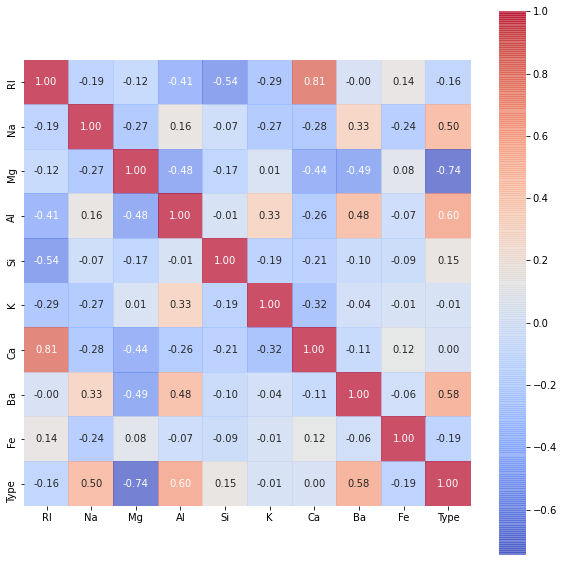

In [6]:
correlation = glass.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, annot = True, fmt = '.2f', alpha = 0.7, cmap = 'coolwarm')
plt.show()

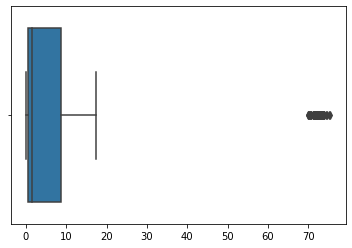

In [7]:
sns.boxplot(x=glass)

In [8]:
Q1 = glass.quantile(0.25)
Q3 = glass.quantile(0.75)
IQR = Q3 - Q1
outliers=((glass < (Q1 - 1.5 * IQR)) | (glass > (Q3 + 1.5 * IQR))).sum()

In [9]:
final=glass.drop(outliers).reset_index(drop=True)
print(final.shape)

(206, 10)


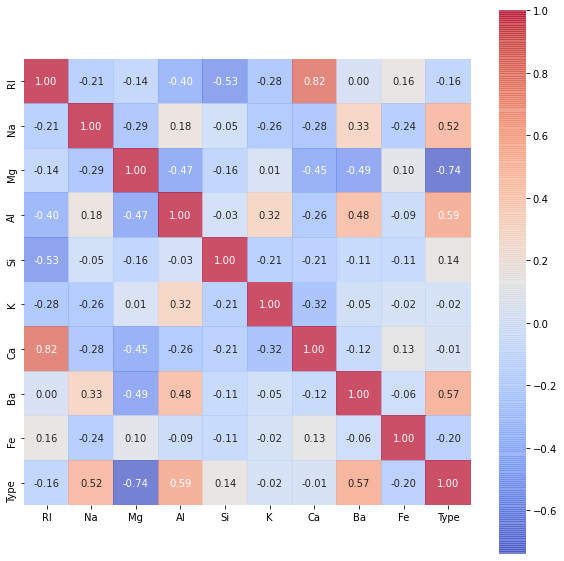

In [10]:
correlation = final.corr()

plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, annot = True, fmt = '.2f', alpha = 0.7, cmap = 'coolwarm')
plt.show()

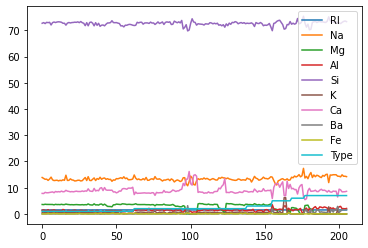

In [11]:
final.plot()

We see that Si contibutes the most in the manufacturing of glass

In [12]:
x=final.iloc[:,:-1].values
y=final.iloc[:,-1].values

In [13]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

**KNN Classifier**

In [14]:
classifier=KNeighborsClassifier(n_neighbors=3)

In [15]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred=classifier.predict(x_test)

In [17]:
print('accuracy: ',accuracy_score(y_test,y_pred))

accuracy:  0.7096774193548387


**Random Forest Classifier**

In [18]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [19]:
rf_final=rf.predict(x_test)

In [20]:
print('accuracy: ',accuracy_score(y_test,rf_final))

accuracy:  0.8387096774193549


**Decision Tree Classifier**

In [21]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
dt_final=dt.predict(x_test)

In [23]:
print('accuracy: ',accuracy_score(y_test,dt_final))

accuracy:  0.7903225806451613


We see that, compared to **Decision Tree and KNN Classifier**, the Random Forest Classifier is giving a better accuracy, therefore we must proceed with **Random Forest**